# Comparez les valeurs LF/HF pour évaluer l’état du système nerveux autonome. comment?

# Analyse Spectrale des Intervalles RR : Calcul des LF et HF

In [3]:
import pandas as pd

# Importer les données
file_path = "C:\\Users\\user\\OneDrive\\Documents\\M2 SNS IDS\\HAH913E - Santé activité physique 5\\Physiologie\\Py_Data_HRV - Data.csv"
hrv_data = pd.read_csv(file_path)

# Afficher la strucutres 
hrv_data.head()

,Date,28/10/2024,29/10/2024,30/10/2024,31/10/2024,01/11/2024,02/11/2024,03/11/2024,04/11/2024,5/11/2024,...,15/11/2024,16/11/2024,17/11/2024,18/11/2024,19/11/2024,20/11/2024,21/11/2024,22/11/2024,23/11/2024,24/11/2024
0,Mean RR* (ms),978.0,900.00,921.00,942.00,945.00,812.00,875.00,987.00,964.00,...,962.00,890.00,1034.00,1144.00,956.00,1114.0,990.00,1091.00,1106.00,997.00
1,Mean HR* (bpm),61.0,67.00,65.00,64.00,64.00,74.00,69.00,61.00,62.00,...,62.00,67.00,58.00,52.00,63.00,54.0,61.00,55.00,54.00,60.00
2,SDNN (ms),182.5,167.10,192.60,212.20,214.60,148.70,184.50,228.10,692.60,...,283.00,178.20,233.00,251.10,158.50,137.8,198.90,153.80,163.80,166.60
3,RMSSD (ms),226.8,187.10,220.70,240.00,244.30,170.80,215.00,278.80,996.00,...,382.30,230.80,325.90,383.60,222.00,189.3,254.60,201.00,237.10,216.90
4,pNN50 (%),64.0,61.76,65.24,66.04,66.25,39.25,57.06,73.03,87.82,...,71.79,64.29,69.44,71.54,67.74,64.0,70.67,60.29,82.84,79.19


In [5]:
import numpy as np
from scipy.signal import welch

# Étape 1 : Extraire les données Mean RR (ms)
rr_intervals = hrv_data.iloc[0, 1:].values.astype(float)  # Ignorer la première colonne de noms

# Étape 2 : Interpolation pour garantir un échantillonnage constant
# Suppose un intervalle de 1 seconde entre chaque valeur (peut être ajusté selon vos données)
time = np.linspace(0, len(rr_intervals) - 1, len(rr_intervals))
interpolated_rr = np.interp(np.arange(0, len(rr_intervals), 0.25), time, rr_intervals)  # Échantillonnage à 4 Hz

# Étape 3 : Analyse spectrale (utilisation de Welch pour calculer le spectre de puissance)
fs = 4  # Fréquence d'échantillonnage en Hz
frequencies, power = welch(interpolated_rr, fs=fs, nperseg=256)

# Étape 4 : Calcul des puissances dans les bandes LF et HF
lf_band = (frequencies >= 0.04) & (frequencies < 0.15)
hf_band = (frequencies >= 0.15) & (frequencies <= 0.4)

lf_power = np.trapz(power[lf_band], frequencies[lf_band])  # Puissance dans la bande LF
hf_power = np.trapz(power[hf_band], frequencies[hf_band])  # Puissance dans la bande HF

lf_power, hf_power


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 112, using nperseg = 112
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
C:\Users\user\AppData\Local\Temp\ipykernel_2040\365530821.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  lf_power = np.trapz(power[lf_band], frequencies[lf_band])  # Puissance dans la bande LF
C:\Users\user\AppData\Local\Temp\ipykernel_2040\365530821.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  hf_power = np.trapz(power[hf_band], frequencies[hf_band])  # Puissance dans la bande HF


(np.float64(687.3729815766043), np.float64(3434.0578153674414))

- LF (Low Frequency) : 687.37 ms²
- HF (High Frequency) : 3434.06 ms²

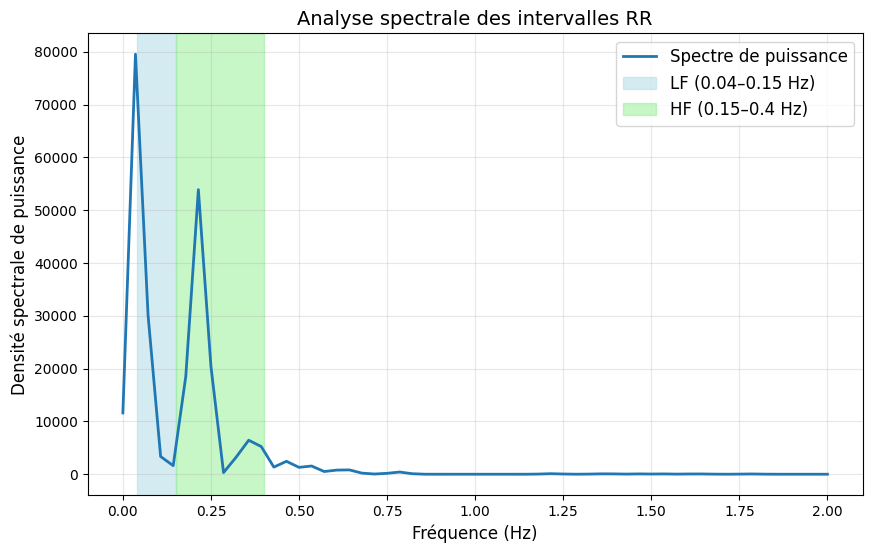

In [6]:
import matplotlib.pyplot as plt

# Graphe du spectre de puissance
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power, label='Spectre de puissance', linewidth=2)
plt.axvspan(0.04, 0.15, color='lightblue', alpha=0.5, label='LF (0.04–0.15 Hz)')
plt.axvspan(0.15, 0.4, color='lightgreen', alpha=0.5, label='HF (0.15–0.4 Hz)')

plt.title("Analyse spectrale des intervalles RR", fontsize=14)
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("Densité spectrale de puissance", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


Les zones colorées représentent les bandes de fréquences :
- LF (0.04–0.15 Hz) : en bleu clair.
- HF (0.15–0.4 Hz) : en vert clair.

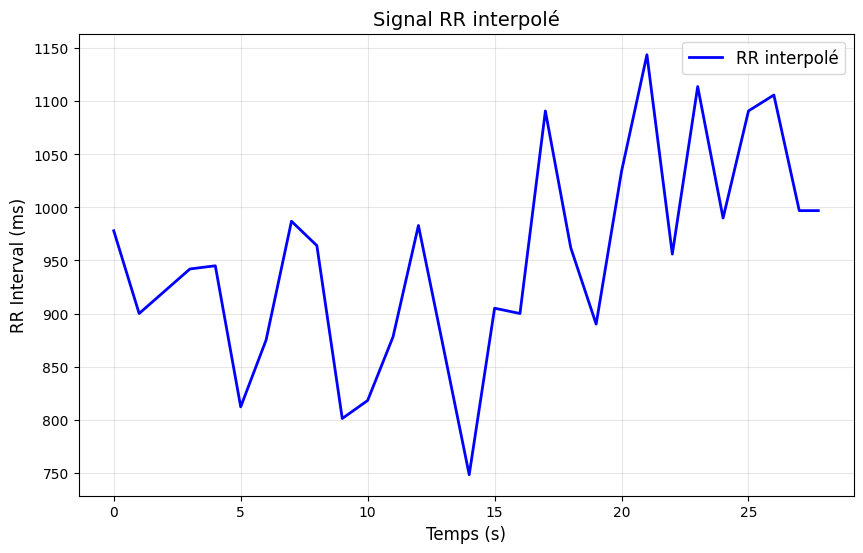

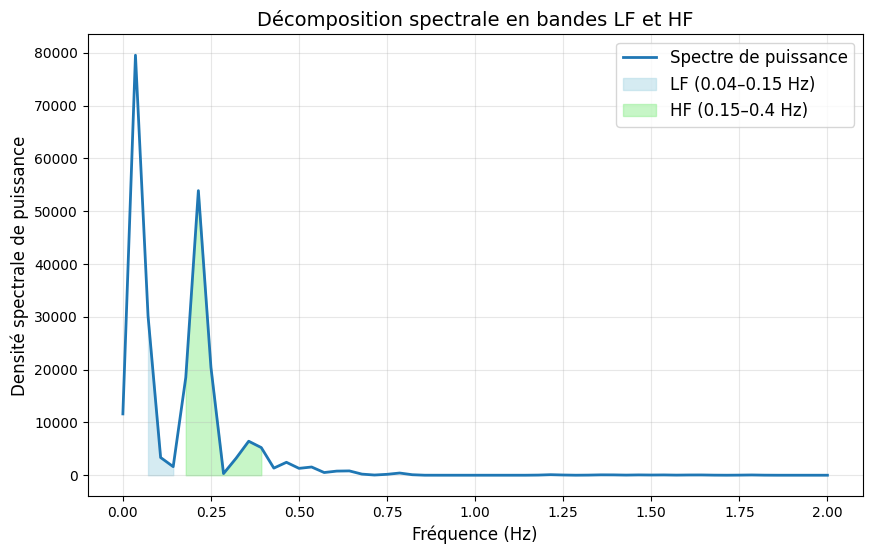

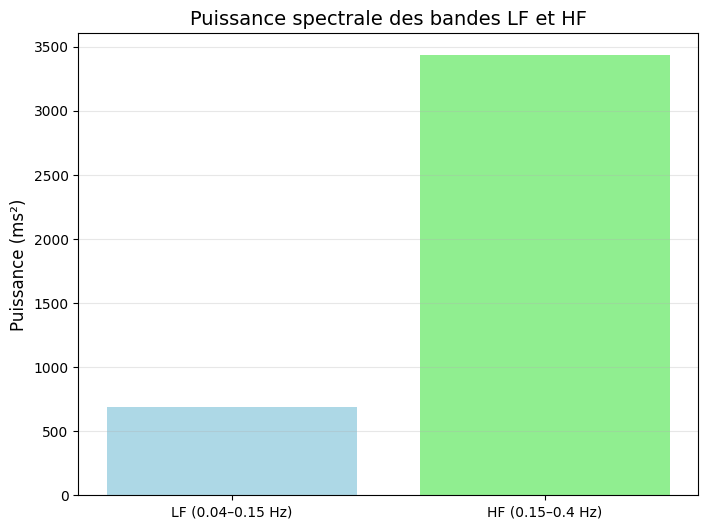

In [7]:
# Graphe 1 : Intervalles RR interpolés
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(interpolated_rr)) / fs, interpolated_rr, label='RR interpolé', color='blue', linewidth=2)
plt.title("Signal RR interpolé", fontsize=14)
plt.xlabel("Temps (s)", fontsize=12)
plt.ylabel("RR Interval (ms)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Graphe 2 : Densité spectrale avec bandes HF et LF séparées
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power, label='Spectre de puissance', linewidth=2)
plt.fill_between(frequencies[lf_band], power[lf_band], color='lightblue', alpha=0.5, label='LF (0.04–0.15 Hz)')
plt.fill_between(frequencies[hf_band], power[hf_band], color='lightgreen', alpha=0.5, label='HF (0.15–0.4 Hz)')

plt.title("Décomposition spectrale en bandes LF et HF", fontsize=14)
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("Densité spectrale de puissance", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Graphe 3 : Comparaison de puissances LF et HF
plt.figure(figsize=(8, 6))
plt.bar(['LF (0.04–0.15 Hz)', 'HF (0.15–0.4 Hz)'], [lf_power, hf_power], color=['lightblue', 'lightgreen'])
plt.title("Puissance spectrale des bandes LF et HF", fontsize=14)
plt.ylabel("Puissance (ms²)", fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.show()



# Calcul du ratio LF/HF pour évaluer l'état du système nerveux autonome

In [9]:
# Calcul du ratio LF/HF
lf_hf_ratio = lf_power / hf_power
lf_hf_ratio


np.float64(0.20016348545461396)

Le ratio LF/HF calculé est de 0.2.



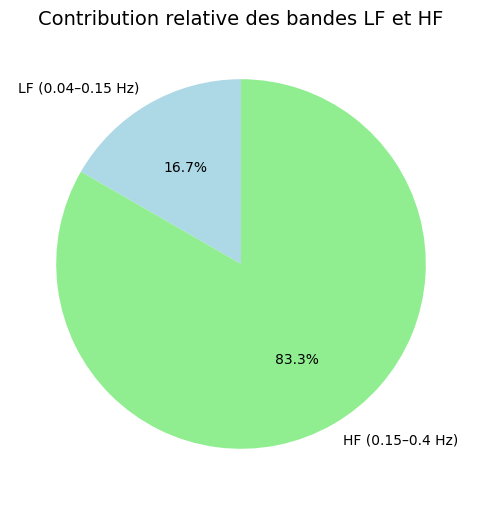

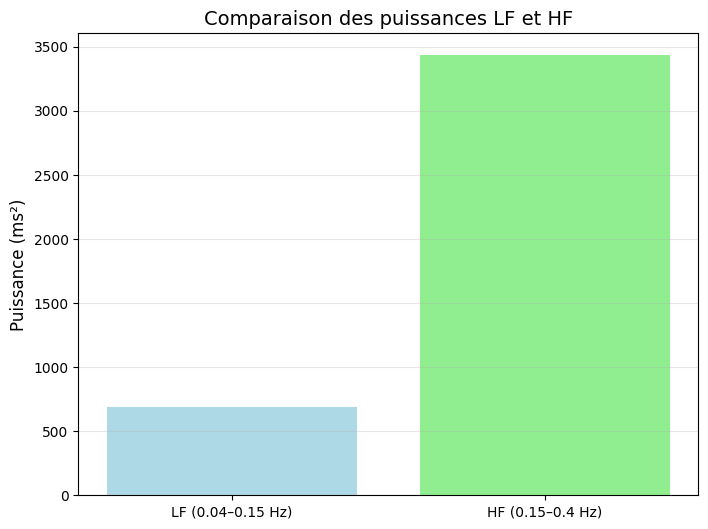

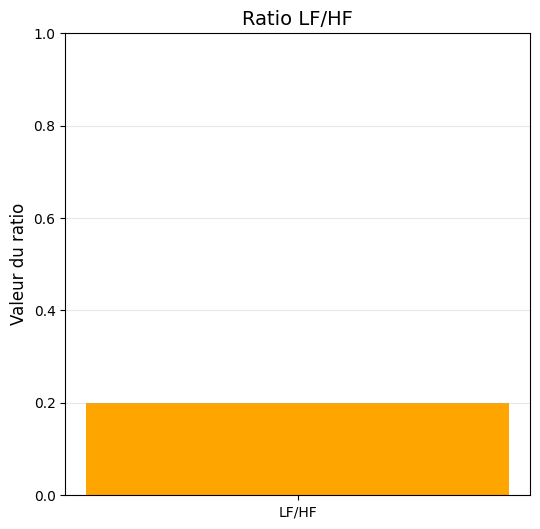

In [10]:
# Graphique 1 : Contribution relative (Pie chart)
plt.figure(figsize=(8, 6))
plt.pie([lf_power, hf_power], labels=['LF (0.04–0.15 Hz)', 'HF (0.15–0.4 Hz)'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title("Contribution relative des bandes LF et HF", fontsize=14)
plt.show()

# Graphique 2 : Puissances absolues (Barres côte à côte)
plt.figure(figsize=(8, 6))
plt.bar(['LF (0.04–0.15 Hz)', 'HF (0.15–0.4 Hz)'], [lf_power, hf_power], color=['lightblue', 'lightgreen'])
plt.title("Comparaison des puissances LF et HF", fontsize=14)
plt.ylabel("Puissance (ms²)", fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.show()

# Graphique 3 : Ratio LF/HF (Barre unique pour mise en évidence)
plt.figure(figsize=(6, 6))
plt.bar(['LF/HF'], [lf_hf_ratio], color='orange')
plt.title("Ratio LF/HF", fontsize=14)
plt.ylabel("Valeur du ratio", fontsize=12)
plt.ylim(0, 1)  # Pour contextualiser le faible ratio
plt.grid(alpha=0.3, axis='y')
plt.show()


# Data 2

In [23]:
# Réimporter les bibliothèques nécessaires
import pandas as pd

# Charger les nouvelles données
new_file_path = "C:\\Users\\user\\OneDrive\\Documents\\M2 SNS IDS\\HAH913E - Santé activité physique 5\\Physiologie\\data4semainesfinal.csv"
new_data = pd.read_csv(new_file_path)

# Afficher les premières lignes pour comprendre la structure des données
new_data.head()


,; Time (s); RR interval (s); Fréquence (Hz);PSD (ms^2/Hz); AR SPECTRUM Fréquence (Hz);AR SPECTRUM PSD (ms^2/Hz);Date
0,;0.976;0.976;0.000;0.3730;0.000;5115.9497;2024...
1,;2.307;1.331;0.003;0.6392;0.003;10251.4397;202...
2,;3.472;1.165;0.007;0.4548;0.007;10310.3423;202...
3,;4.647;1.175;0.010;33.8769;0.010;10409.4606;20...
4,;5.790;1.143;0.013;236.7866;0.013;10550.2446;2...


In [24]:
# Recharger les données avec le séparateur correct
new_data = pd.read_csv(new_file_path, delimiter=';')

# Afficher les premières lignes pour vérifier la structure
new_data.head()


,Unnamed: 0,Time (s),RR interval (s),Fréquence (Hz),PSD (ms^2/Hz),AR SPECTRUM Fréquence (Hz),AR SPECTRUM PSD (ms^2/Hz),Date
0,NaN,0.976,0.976,0.000,0.3730,0.000,5115.9497,2024-10-28
1,NaN,2.307,1.331,0.003,0.6392,0.003,10251.4397,2024-10-28
2,NaN,3.472,1.165,0.007,0.4548,0.007,10310.3423,2024-10-28
3,NaN,4.647,1.175,0.010,33.8769,0.010,10409.4606,2024-10-28
4,NaN,5.790,1.143,0.013,236.7866,0.013,10550.2446,2024-10-28


In [25]:
# Charger les données
new_file_path = r"C:\Users\user\OneDrive\Documents\M2 SNS IDS\HAH913E - Santé activité physique 5\Physiologie\data4semainesfinal.csv"
new_data = pd.read_csv(new_file_path, delimiter=';')

# Vérifier les noms des colonnes
print(new_data.columns)

# Renommer les colonnes pour supprimer les espaces inutiles
new_data.columns = new_data.columns.str.strip()

# Afficher à nouveau les colonnes pour confirmer
print(new_data.columns)


Index(['Unnamed: 0', '      Time   (s)', '      RR interval   (s)',
       '      Fréquence  (Hz)', 'PSD (ms^2/Hz)',
       '    AR SPECTRUM  Fréquence   (Hz)', 'AR SPECTRUM PSD (ms^2/Hz)',
       'Date'],
      dtype='object')
Index(['Unnamed: 0', 'Time   (s)', 'RR interval   (s)', 'Fréquence  (Hz)',
       'PSD (ms^2/Hz)', 'AR SPECTRUM  Fréquence   (Hz)',
       'AR SPECTRUM PSD (ms^2/Hz)', 'Date'],
      dtype='object')


In [27]:
# Supprimer les espaces en début et fin des noms de colonnes
new_data.columns = new_data.columns.str.strip()


In [28]:
print(new_data.columns)


Index(['Unnamed: 0', 'Time   (s)', 'RR interval   (s)', 'Fréquence  (Hz)',
       'PSD (ms^2/Hz)', 'AR SPECTRUM  Fréquence   (Hz)',
       'AR SPECTRUM PSD (ms^2/Hz)', 'Date'],
      dtype='object')


In [32]:
print(new_data.columns.tolist())  # Liste exacte des noms des colonnes


['Unnamed: 0', 'Time   (s)', 'RR interval   (s)', 'Fréquence  (Hz)', 'PSD (ms^2/Hz)', 'AR SPECTRUM  Fréquence   (Hz)', 'AR SPECTRUM PSD (ms^2/Hz)', 'Date']


In [33]:
# Renommer la colonne pour supprimer les espaces inutiles
new_data.rename(columns={'RR interval   (s)': 'RR interval (s)'}, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_2040\507575434.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  lf_power_new = np.trapz(power_new[lf_band_new], frequencies_new[lf_band_new])  # Puissance LF
C:\Users\user\AppData\Local\Temp\ipykernel_2040\507575434.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  hf_power_new = np.trapz(power_new[hf_band_new], frequencies_new[hf_band_new])  # Puissance HF


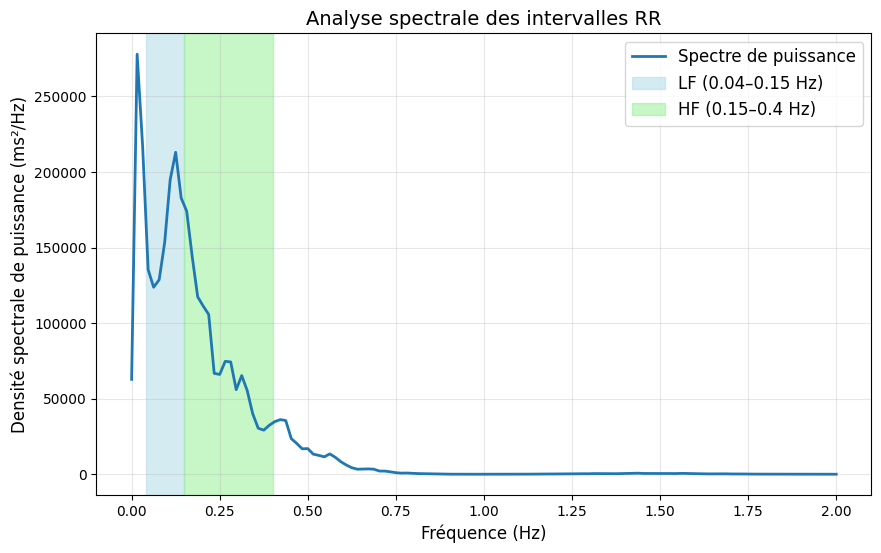

Puissance LF : 15197.77 ms²
Puissance HF : 17809.30 ms²
Ratio LF/HF : 0.85


In [35]:
# Conversion en numérique et suppression des valeurs manquantes
new_data['RR interval (s)'] = pd.to_numeric(new_data['RR interval (s)'], errors='coerce')  # Convertir en numérique
cleaned_data = new_data.dropna(subset=['RR interval (s)'])  # Supprimer les lignes avec valeurs manquantes

# Conversion des intervalles RR en millisecondes
rr_intervals_new = cleaned_data['RR interval (s)'].astype(float) * 1000  # Conversion en ms

# Interpolation pour garantir un échantillonnage constant
time_new = np.linspace(0, len(rr_intervals_new) - 1, len(rr_intervals_new))
interpolated_rr_new = np.interp(np.arange(0, len(rr_intervals_new), 0.25), time_new, rr_intervals_new)

# Analyse spectrale
fs_new = 4  # Fréquence d'échantillonnage en Hz
frequencies_new, power_new = welch(interpolated_rr_new, fs=fs_new, nperseg=256)

# Calcul des bandes LF et HF
lf_band_new = (frequencies_new >= 0.04) & (frequencies_new < 0.15)
hf_band_new = (frequencies_new >= 0.15) & (frequencies_new <= 0.4)

lf_power_new = np.trapz(power_new[lf_band_new], frequencies_new[lf_band_new])  # Puissance LF
hf_power_new = np.trapz(power_new[hf_band_new], frequencies_new[hf_band_new])  # Puissance HF
lf_hf_ratio_new = lf_power_new / hf_power_new  # Ratio LF/HF

# Visualisation du spectre de puissance
plt.figure(figsize=(10, 6))
plt.plot(frequencies_new, power_new, label='Spectre de puissance', linewidth=2)
plt.axvspan(0.04, 0.15, color='lightblue', alpha=0.5, label='LF (0.04–0.15 Hz)')
plt.axvspan(0.15, 0.4, color='lightgreen', alpha=0.5, label='HF (0.15–0.4 Hz)')
plt.title("Analyse spectrale des intervalles RR", fontsize=14)
plt.xlabel("Fréquence (Hz)", fontsize=12)
plt.ylabel("Densité spectrale de puissance (ms²/Hz)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Résultats
print(f"Puissance LF : {lf_power_new:.2f} ms²")
print(f"Puissance HF : {hf_power_new:.2f} ms²")
print(f"Ratio LF/HF : {lf_hf_ratio_new:.2f}")


In [36]:
# Calcul de la fréquence d'échantillonnage pour la 2ème dataset
time_values = pd.to_numeric(new_data['Time   (s)'].str.strip(), errors='coerce').dropna()
time_differences = time_values.diff().dropna()  # Différences entre les temps consécutifs
sampling_frequency = 1 / time_differences.mean()  # Fréquence d'échantillonnage moyenne

print(f"Fréquence d'échantillonnage (2ème dataset) : {sampling_frequency:.2f} Hz")


Fréquence d'échantillonnage (2ème dataset) : 29.81 Hz
